In [2]:
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import time

import rebound
import hyperion
from hyperion.model import AnalyticalYSOModel
from hyperion.model import ModelOutput
from hyperion.util.constants import rsun, lsun, au, msun, yr, c

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-24
eV=1.602176634e-12
h_bar=1.0545718e-27
R_sun=6.957e+10

h=0.6774

# 1.

## I=$\int_{1}^{5} \frac{1}{x^{3/2}} dx = -2[x^{-1/2}]_{1}^{5} = 2(1-1/\sqrt{5})=1.1055728$


In [11]:
def f(x):
    return x**(-3/2)

In [15]:
N=100000000

t=0
x=np.random.rand(N)*4+1
t=f(x)

I=np.sum(t)/N*4
I

1.105595827640461

## In terms of the accuracy, polynomial approaches will be better because the results don't rely on randomness.    
## However, I prefer MC integration since it is really simple and easy to parallelize.

# 2.

## In terms of the accuracy, polynomial approaches will be better because the results don't rely on randomness.    
## However, I prefer MC integration since it is really simple and easy to parallelize.

In [53]:
m = 9*14**9+1
print(m)

185949421057


In [54]:
def gen_random(seed):
    a = 1234567
    c = 987654328
    m = 9*14**9+1
    
    x=(a*seed+c)%m
    return x

In [75]:
m = 9*14**9+1
seed=21

N=100000
rand_list=np.zeros(N)
x_list=np.zeros(N)
y_list=np.zeros(N)

start = time.time()

for i in range(N):
    rand_list[i]=seed/m
    x_list[i]=seed/m
    seed=gen_random(seed)
    y_list[i]=seed/m
    
end = time.time()
print(end - start, 'sec')

0.0943746566772461 sec


(array([3332., 3296., 3345., 3350., 3295., 3344., 3245., 3303., 3345.,
        3391., 3290., 3351., 3344., 3400., 3306., 3411., 3297., 3258.,
        3305., 3259., 3414., 3426., 3363., 3412., 3261., 3346., 3315.,
        3363., 3316., 3317.]),
 array([1.12933936e-10, 3.33332022e-02, 6.66664043e-02, 9.99996065e-02,
        1.33332809e-01, 1.66666011e-01, 1.99999213e-01, 2.33332415e-01,
        2.66665617e-01, 2.99998819e-01, 3.33332021e-01, 3.66665223e-01,
        3.99998425e-01, 4.33331628e-01, 4.66664830e-01, 4.99998032e-01,
        5.33331234e-01, 5.66664436e-01, 5.99997638e-01, 6.33330840e-01,
        6.66664042e-01, 6.99997244e-01, 7.33330447e-01, 7.66663649e-01,
        7.99996851e-01, 8.33330053e-01, 8.66663255e-01, 8.99996457e-01,
        9.33329659e-01, 9.66662861e-01, 9.99996064e-01]),
 <a list of 30 Patch objects>)

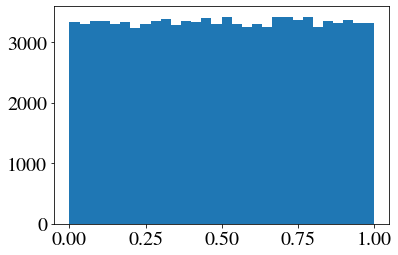

In [71]:
plt.hist(rand_list, bins=30)

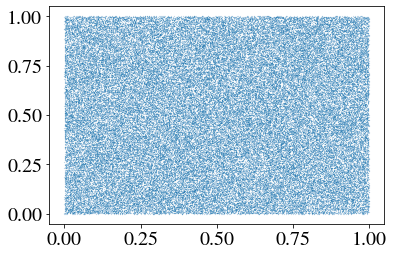

In [72]:
plt.plot(x_list,y_list,'.',ms=0.2)

In [163]:
x=0.4 # mean free path
R=7000
m = 9*14**9+1
N=1000000000 # iteration number

r_0=0.4
theta_0=0


# MC simulation
r=r_0
theta=theta_0

t_now = time.time() 
seed=int(t_now*1e3)%1000 # seed is randomized by current time
#seed=23 # random seed

start = time.time()

for i in range(N):
    seed=gen_random(seed)
    phi=2*np.pi*seed/m

    r_new=(r**2+x**2-2*r*x*np.cos(phi))**0.5
    theta_newt=np.arcsin((x-r*np.cos(phi))/r_new)+phi-3/2*np.pi
    theta_new=theta+theta_newt
        
    r=r_new
    theta=theta_new%(2*np.pi)
    
    
    if r>R:
        break
    
    if (i+1)%(N//10)==0:
        print(i+1, r, theta)

print('done', i, r, theta)        

end = time.time()
print(end - start, 'sec')

100000000 4546.6300181038605 5.552899497190359
done 110181441 7000.152479432116 6.153596066705916
909.3420760631561 sec


[313.0, 26135.6, 3513349.4]


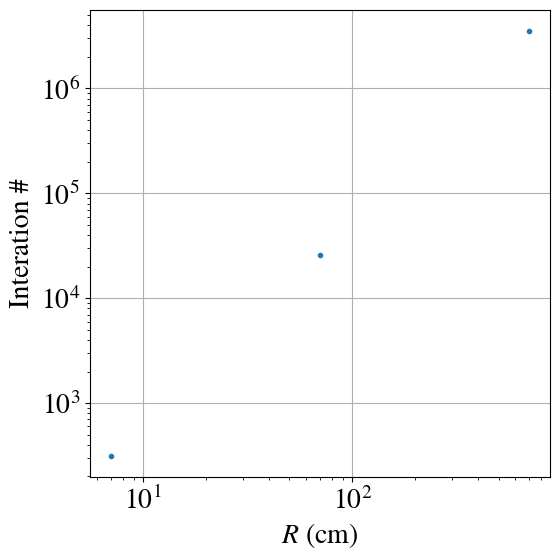

In [4]:
# results
R_list=np.array([7,70,700])#,7000,70000])
i1=np.array([437, 90, 118, 323, 597])
i2=np.array([18062, 38319, 24021, 37210, 13066])
i3=np.array([1986860, 4991093, 1620432, 3437643, 5530719])
#i4=np.array([110181441, , , , ])

t=[np.mean(i1),np.mean(i2),np.mean(i3)]
print(t)
i_list=np.array(t)#,np.mean(i4)])


# figure
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(R_list, i_list, '.')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel('$R$ (cm)')
ax1.set_ylabel('Interation #')

plt.tight_layout()

## Considering that R$_{\odot} = 7\times 10^{10}$ cm and by an extrapolation from those data points, iteration number will be $n_{\rm iter} \sim 3 \times 10^{20}$.
## Corresponding light travel time will be $n_{\rm iter}\times l_{\rm mfp}\,/\,c \sim 130$ years.

In [6]:
3e20*0.4/3e10/(365*24*3600)

126.83916793505834

# 3. is in another .ipynb file